# 번역서 02.4 부터의 내용은 아래 코드에서 Sharing Your Model 부분부터 참조하세요.

In [ ]:
# 원서의 깃허브에서 제공하는 코드는 원서의 내용보다 훨씬 방대합니다.
# 이에 따라, 원서 본문 및 번역번 본문에서는 깃허브 제공 코드의 일부분만 설명하고 있습니다.
# 이는 타 챕터에도 적용됩니다.

# HuggingFace Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install datasets
!pip install accelerate
!pip install ftfy
!pip install tensorboard
!pip install Jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip3 install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-d4acj0hj
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-d4acj0hj
  Resolved https://github.com/huggingface/diffusers to commit 1b202c5730631417000585e3639539cefc79cbd7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3224608 sha256=e9ac5f2befcfc7149b34655d29091de38532f5b3c0d858adadb8d8a35f15ccbf
  Stored in directory: /tmp/pip-ephem-wheel-cache-h46z_w5_/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


## Create Custom Tokenizer and Save it as JSON

In [ ]:
with open(
    "/content/drive/MyDrive/Book6/Ch2/tokenizer_train.txt", "r"
) as file:
    dataset = [line.strip() for line in file.readlines()]


In [ ]:
from tokenizers import Tokenizer, models, pre_tokenizers, trainers

'''학습'''
# 데이터셋 불러오기
with open("/content/drive/MyDrive/Book6/Ch2/tokenizer_train.txt", "r") as file:
    dataset = [line.strip() for line in file.readlines()]

# BPE tokenizer 인스턴스화
tokenizer = Tokenizer(models.BPE())

# 입력을 words로 바꾸기 위해 pre-tokenizer 설정
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# BPE tokenizer를 데이터셋으로 학습시킴
trainer = trainers.BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.train_from_iterator(dataset, trainer=trainer)

tokenizer.save("/content/drive/MyDrive/Book6/Ch2/tokenizer.json")

## Load the Tokenizer from File and conduct Tokenization

In [ ]:
'''추론'''
from transformers import PreTrainedTokenizerFast
fast_tokenizer = PreTrainedTokenizerFast(
    tokenizer_file=(
        "/content/drive/MyDrive/Book6/Ch2/tokenizer.json"
        )
)
text = "The Tokenizers"
encoded = tokenizer.encode(text)

# 토큰화된 텍스트 출력
print(encoded.tokens)

['T', 'h', 'e', 'T', 'o', 'ken', 'iz', 'ers']


## Visualize Tokenization

In [ ]:
from tokenizers.tools import EncodingVisualizer
# 토큰화 프로세스 시각화
visualizer = EncodingVisualizer(fast_tokenizer._tokenizer)
visualizer(text="The Tokenizers")

# HuggingFace Pre-Trained Tokenizer

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
print( tokenizer.tokenize("The tokenizers") )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

['the', 'token', '##izer', '##s']


# HuggingFace Dataset
## Loading Pre-built Dataset

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

# IMDb 데이터셋 불러오기
imdb_dataset = load_dataset("imdb")

# 사전 학습 모델과 토크나이저 불러오기
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 데이터셋에서 샘플 텍스트 추출
sample_text = imdb_dataset["test"][0]["text"]
print (sample_text)

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they have to alway

## Using Pre-built Dataset for Sentiment Analysis

In [ ]:
from transformers import  AutoModelForSequenceClassification, pipeline
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_analysis_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# 데이터셋에서 샘플 텍스트 추출
sample_text = imdb_dataset["test"][0]["text"]

# 샘플 텍스트에 감성 분석 적용
result = sentiment_analysis_pipeline(sample_text)

# 결과 출력
print("Sample Text:", sample_text)
print("Sentiment Analysis Result:", result)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cpu


Sample Text: I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they 

## Converting HuggingFace Dataset to PyTorch Tensor
There are two ways to achieve this:

1. First, by converting the data to a PyTorch tensor using `.with_format("torch")`
2. Second, by creating a custom dataset class.
We will explore both approaches.


### 1. Convert to PyTorch Tensor using `.with_format("torch")

In [ ]:
from datasets import load_dataset
from torch.utils.data import DataLoader, Dataset
import torch

# 허깅페이스 데이터셋 불러오기(예: IMDb dataset)
imdb_dataset = load_dataset("imdb").with_format("torch")
print (type(imdb_dataset['train']))


<class 'datasets.arrow_dataset.Dataset'>


Note: `.with_format("torch")` will convert the data into PyTorch Tensor. This can be directly fed to PyTorch DataLoader

### Reviewing the prebuilt dataset

In [ ]:
from datasets import DatasetInfo
DatasetInfo(imdb_dataset)

DatasetInfo(description=DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
}), citation='', homepage='', license='', features=None, post_processed=None, supervised_keys=None, builder_name=None, dataset_name=None, config_name=None, version=None, splits=None, download_checksums=None, download_size=None, post_processing_size=None, dataset_size=None, size_in_bytes=None)

In [ ]:
imdb_train=imdb_dataset['train']
imdb_train[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

### 2. By Creating PyTorch CustomDataset





In [ ]:
from datasets import load_dataset
from torch.utils.data import DataLoader, Dataset
import torch

# 허깅페이스 데이터셋 불러오기
imdb_dataset = load_dataset("imdb")

# 데이터셋을 전처리한 후 딕셔너리 리스트 출력
# 이 딕셔너리는 text와 label을 포함
def preprocess(data):
    dataset = []
    for example in data:
        text = example["text"].lower()
        label = example["label"]
        dataset.append({"text": text, "label": label})
    return dataset

# 학습 데이터 생성
train_data = preprocess(imdb_dataset["train"])


In [ ]:
# torch.utils.data.Dataset을 상속하는 CustomDataset 클래스 생성
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
train_dataset = CustomDataset(train_data)

In [ ]:
train_dataset[0]

{'text': 'i rented i am curious-yellow from my video store because of all the controversy that surrounded it when it was first released in 1967. i also heard that at first it was seized by u.s. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" i really had to see this for myself.<br /><br />the plot is centered around a young swedish drama student named lena who wants to learn everything she can about life. in particular she wants to focus her attentions to making some sort of documentary on what the average swede thought about certain political issues such as the vietnam war and race issues in the united states. in between asking politicians and ordinary denizens of stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />what kills me about i am curious-yellow is that 40 years ago, this was considered pornographic. really, the sex and nudity scenes are few and far be

# 번역서 02.4 부터의 내용은 이 부분부터 참조하세요.

# Sharing your model
1. Create account in huggingface:
[https://huggingface.co/join](https://huggingface.co/join)
2. Create a new model
[https://huggingface.co/new](https://huggingface.co/new)
3. Upload the code
4. Edit Model Cart
5. Create space via gradio

## 1. Create account in huggingface:
* Go to the link and create account:https://huggingface.co/join
* There is no charge to create account
  1. you just need email id
  2. you do not need credit **card**

## 2. Create a new model
* Go to the link [https://huggingface.co/new](https://huggingface.co/new) and fill the details.*italicized text*

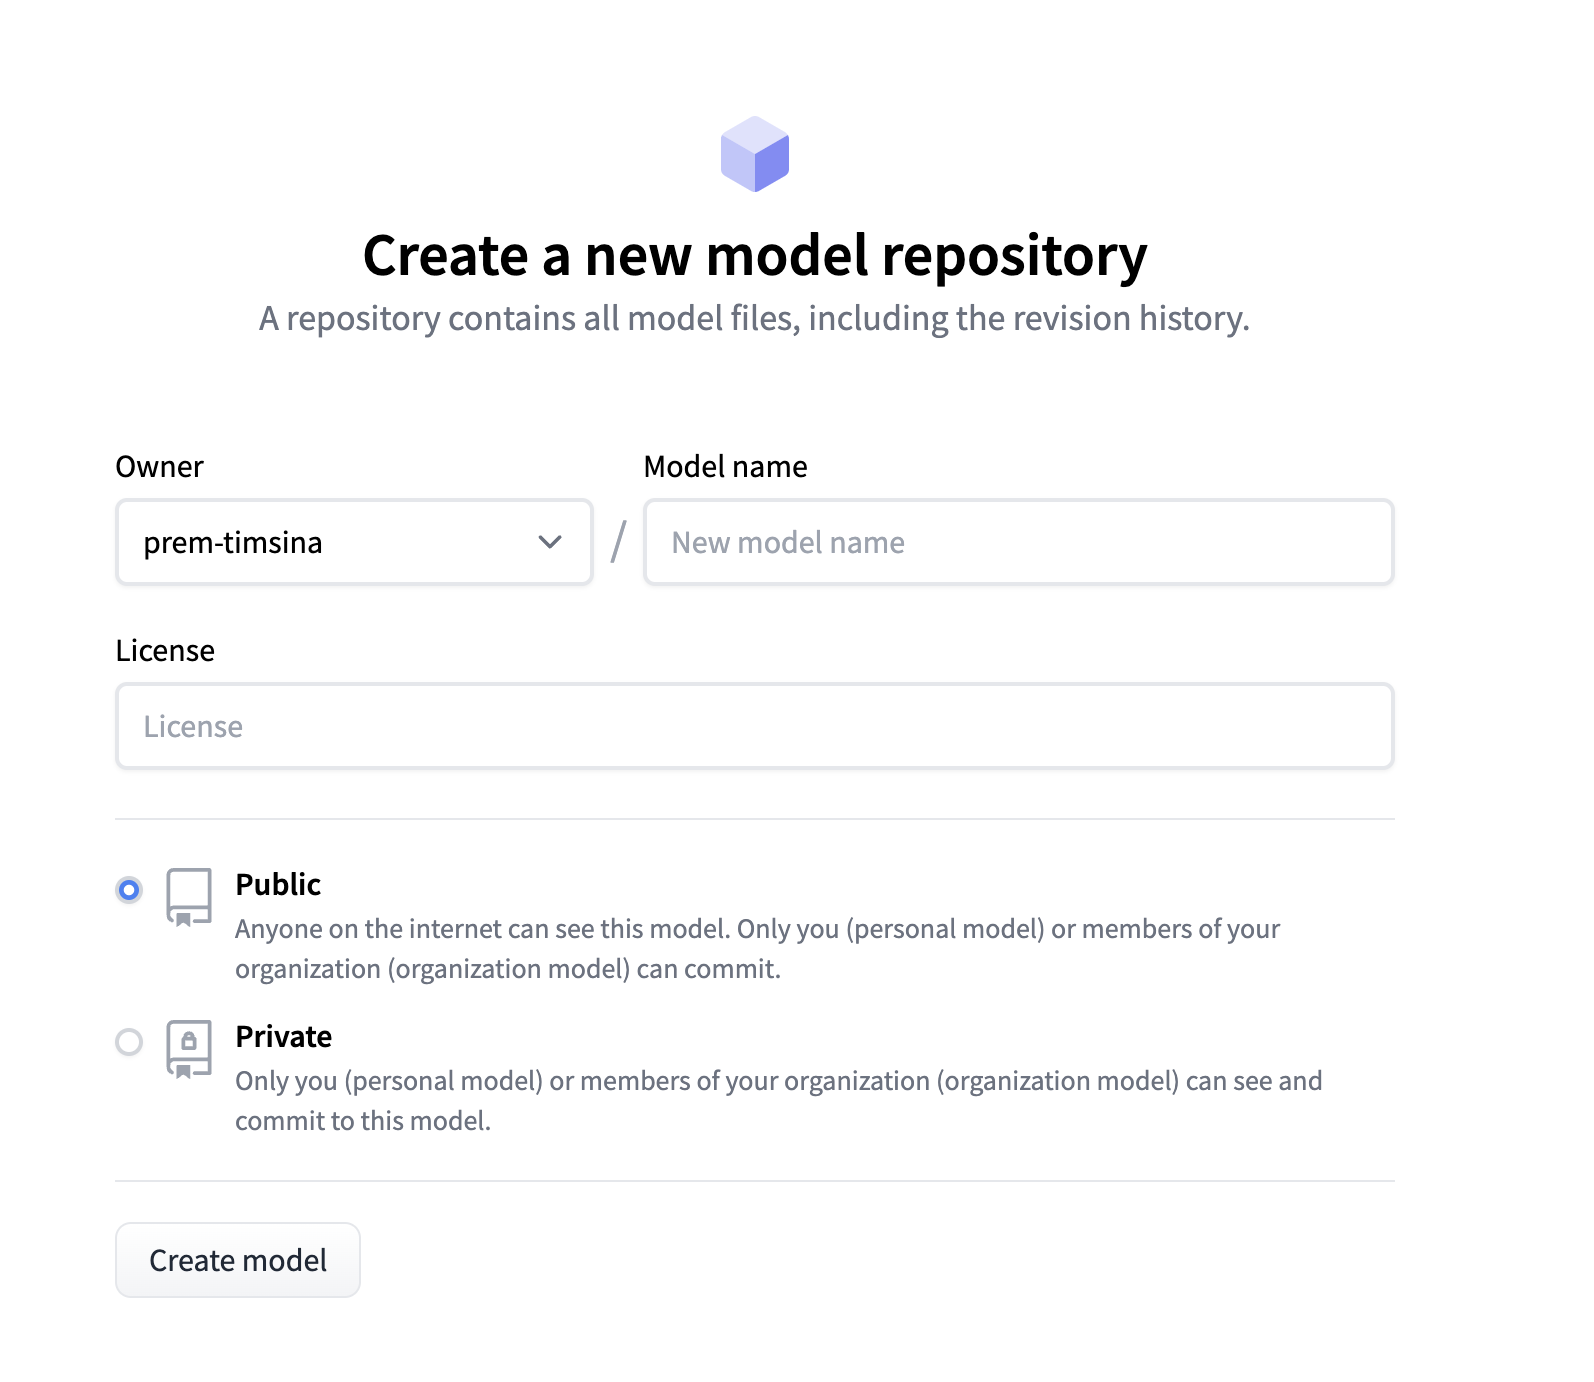

##3. Upload Codes
* Upload all the necessary files and directories and make sure to provide the required license. You can easily drag and drop the files to upload them.
* Specifically for the project we worked on in this chapter, ensure that you upload the designated files and directories.
  1. feature_extractor
  2. model_index.json
  3. safety_checker
  4. scheduler
  5. text_encoder
  6. tokenizer
  7. unet
  8. vae

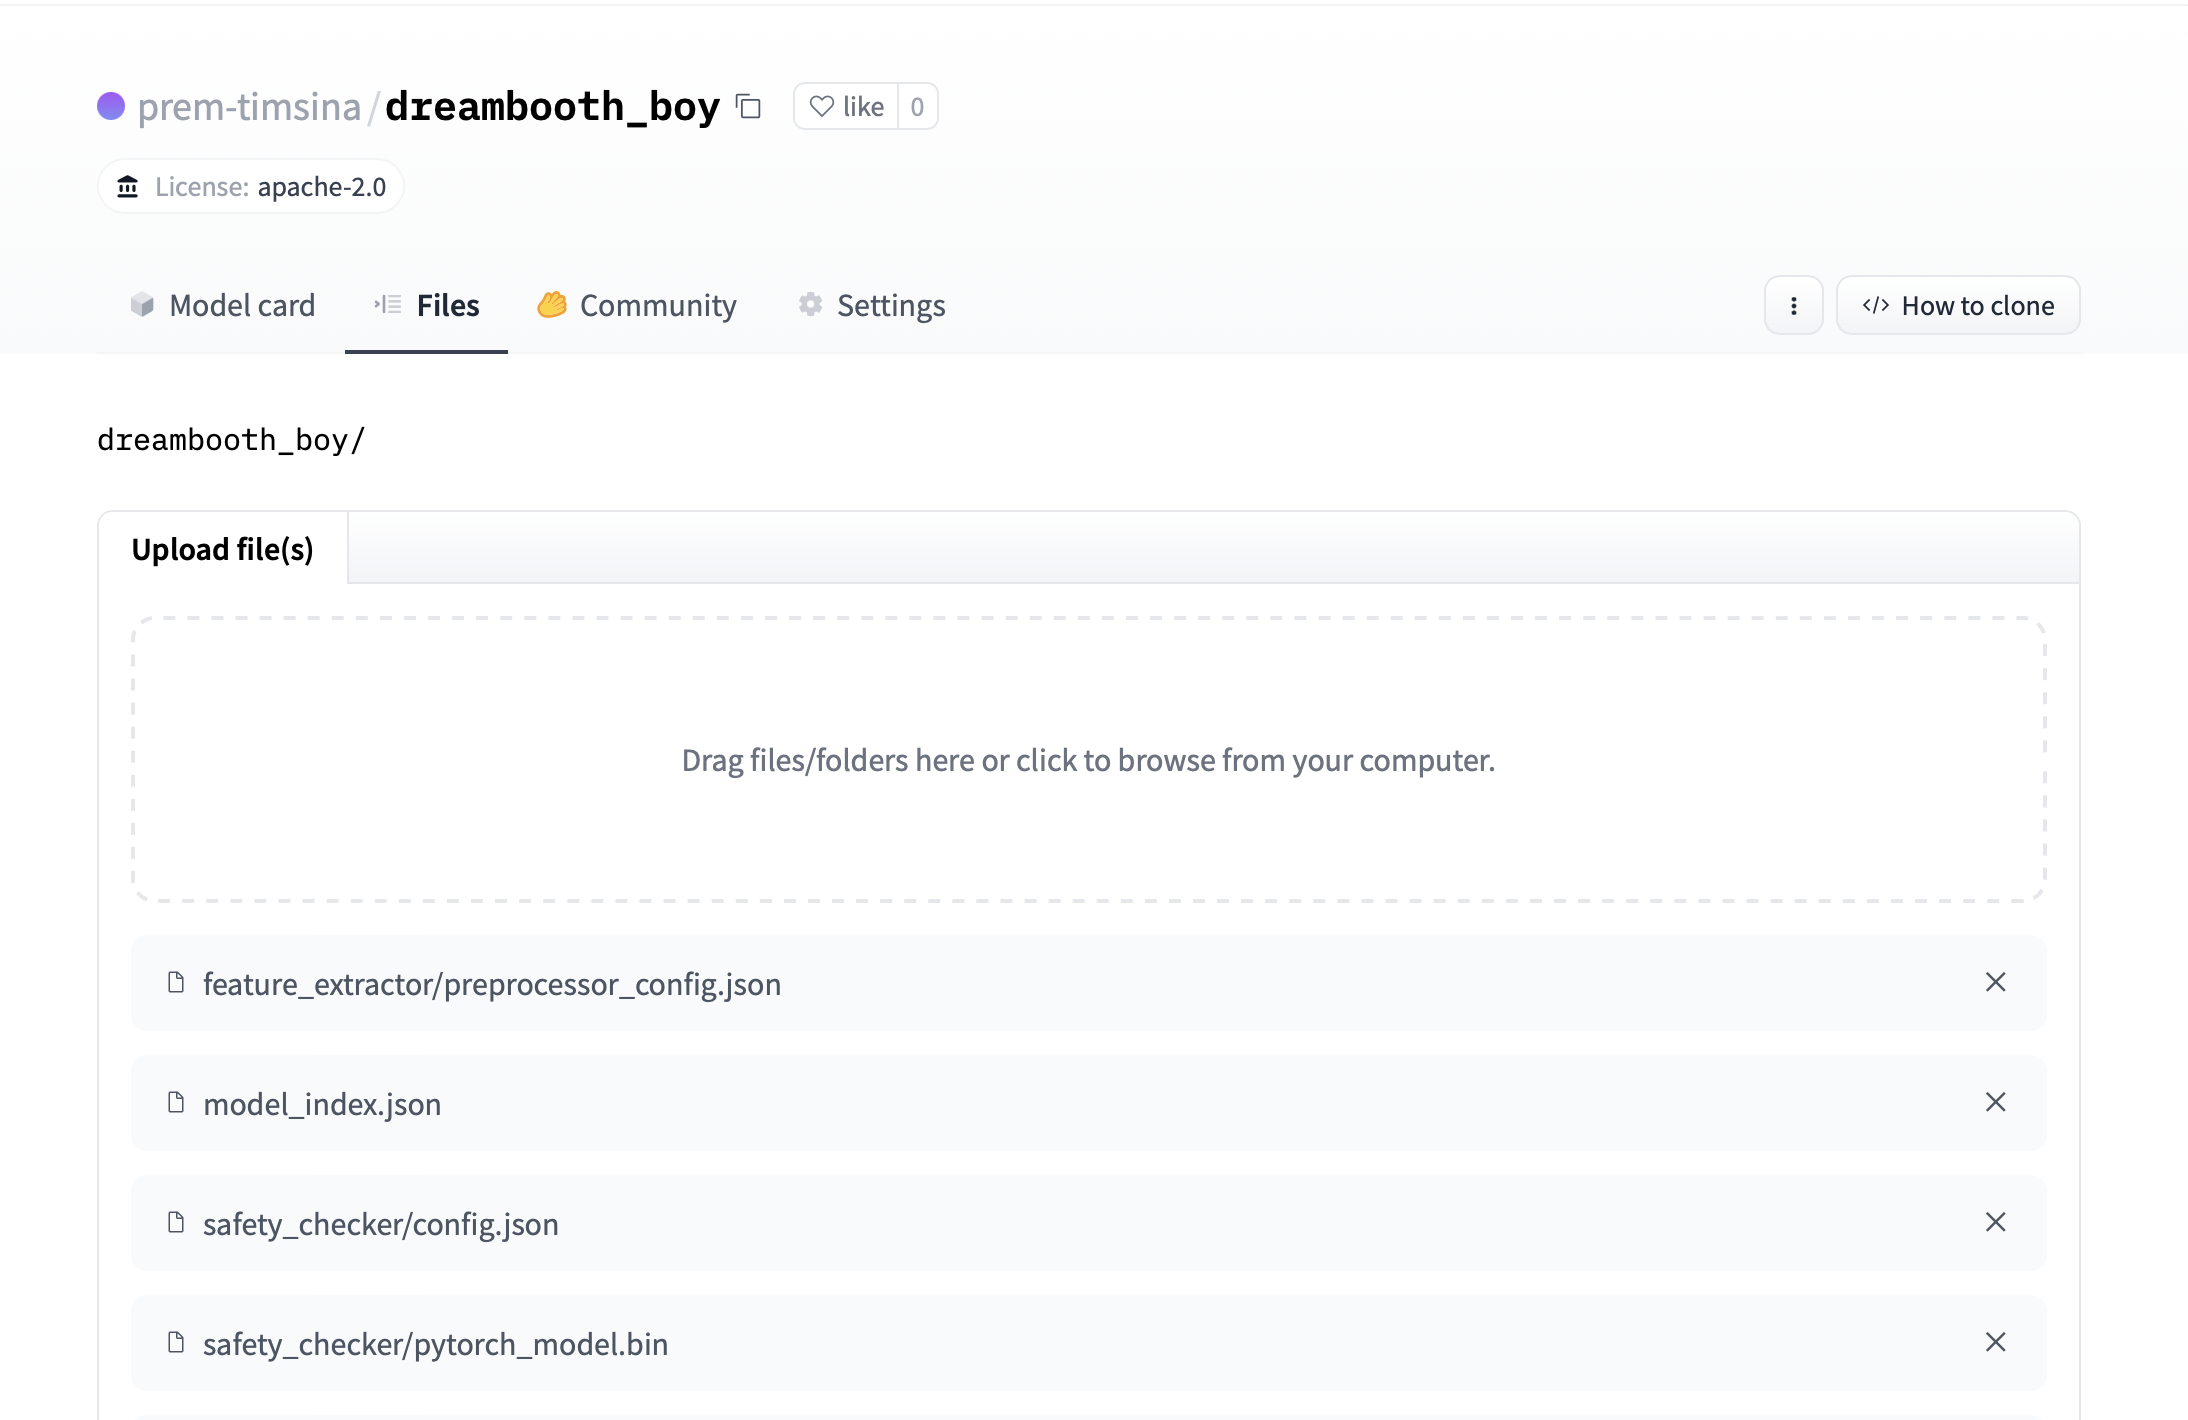

## 4. Edit the model card
As shown in the below picture: You can click **Edit Model card**

Below is an example of a simple model card.
```
---
license: apache-2.0
language:
- en
library_name: diffusers
pipeline_tag: text-to-image
---
```


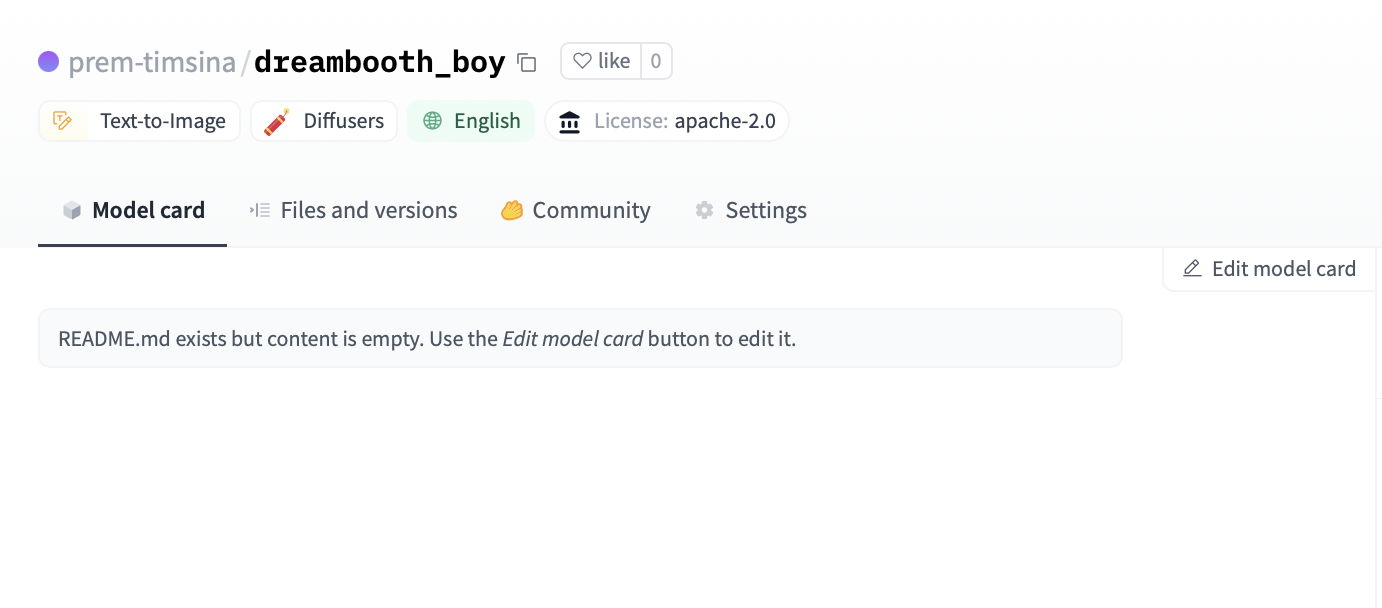



---
# **Congratulations, your model is now available on Hugging Face!**

---




After successfully editing the model card, Hugging Face will automatically provide you with the Hosted Inference API, which is displayed as shown in the diagram below.


---


---




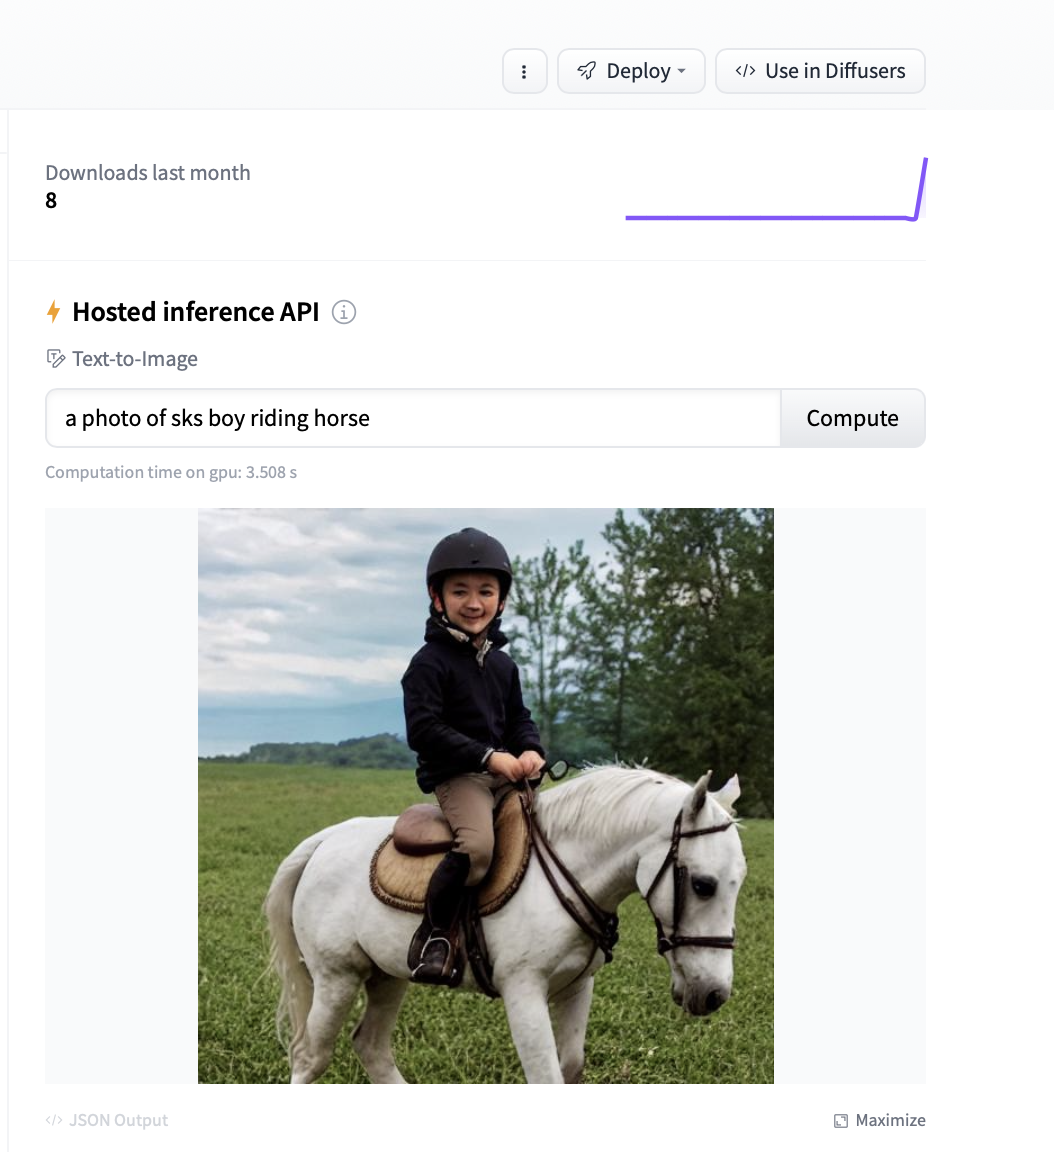

## 5. Now lets create Spaces
 First click on the Deploy ==> Spaces as shown in below picture

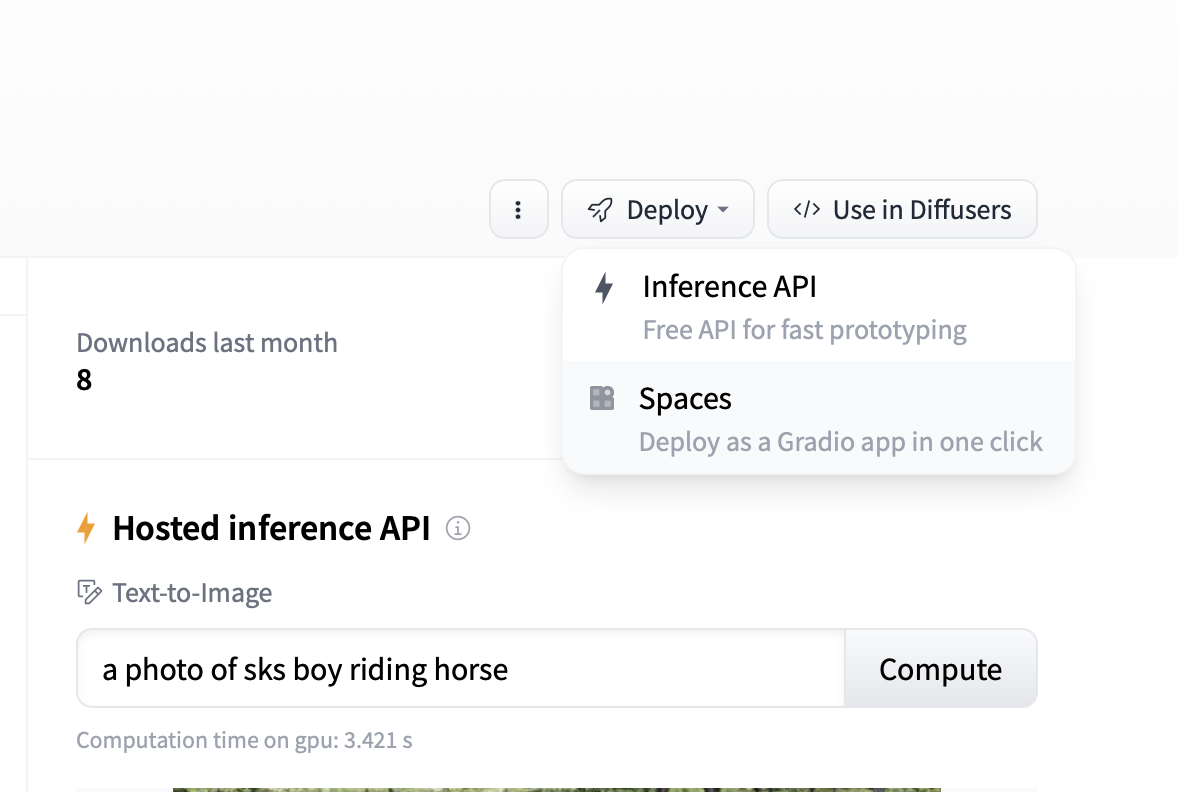

### Fill out the details:
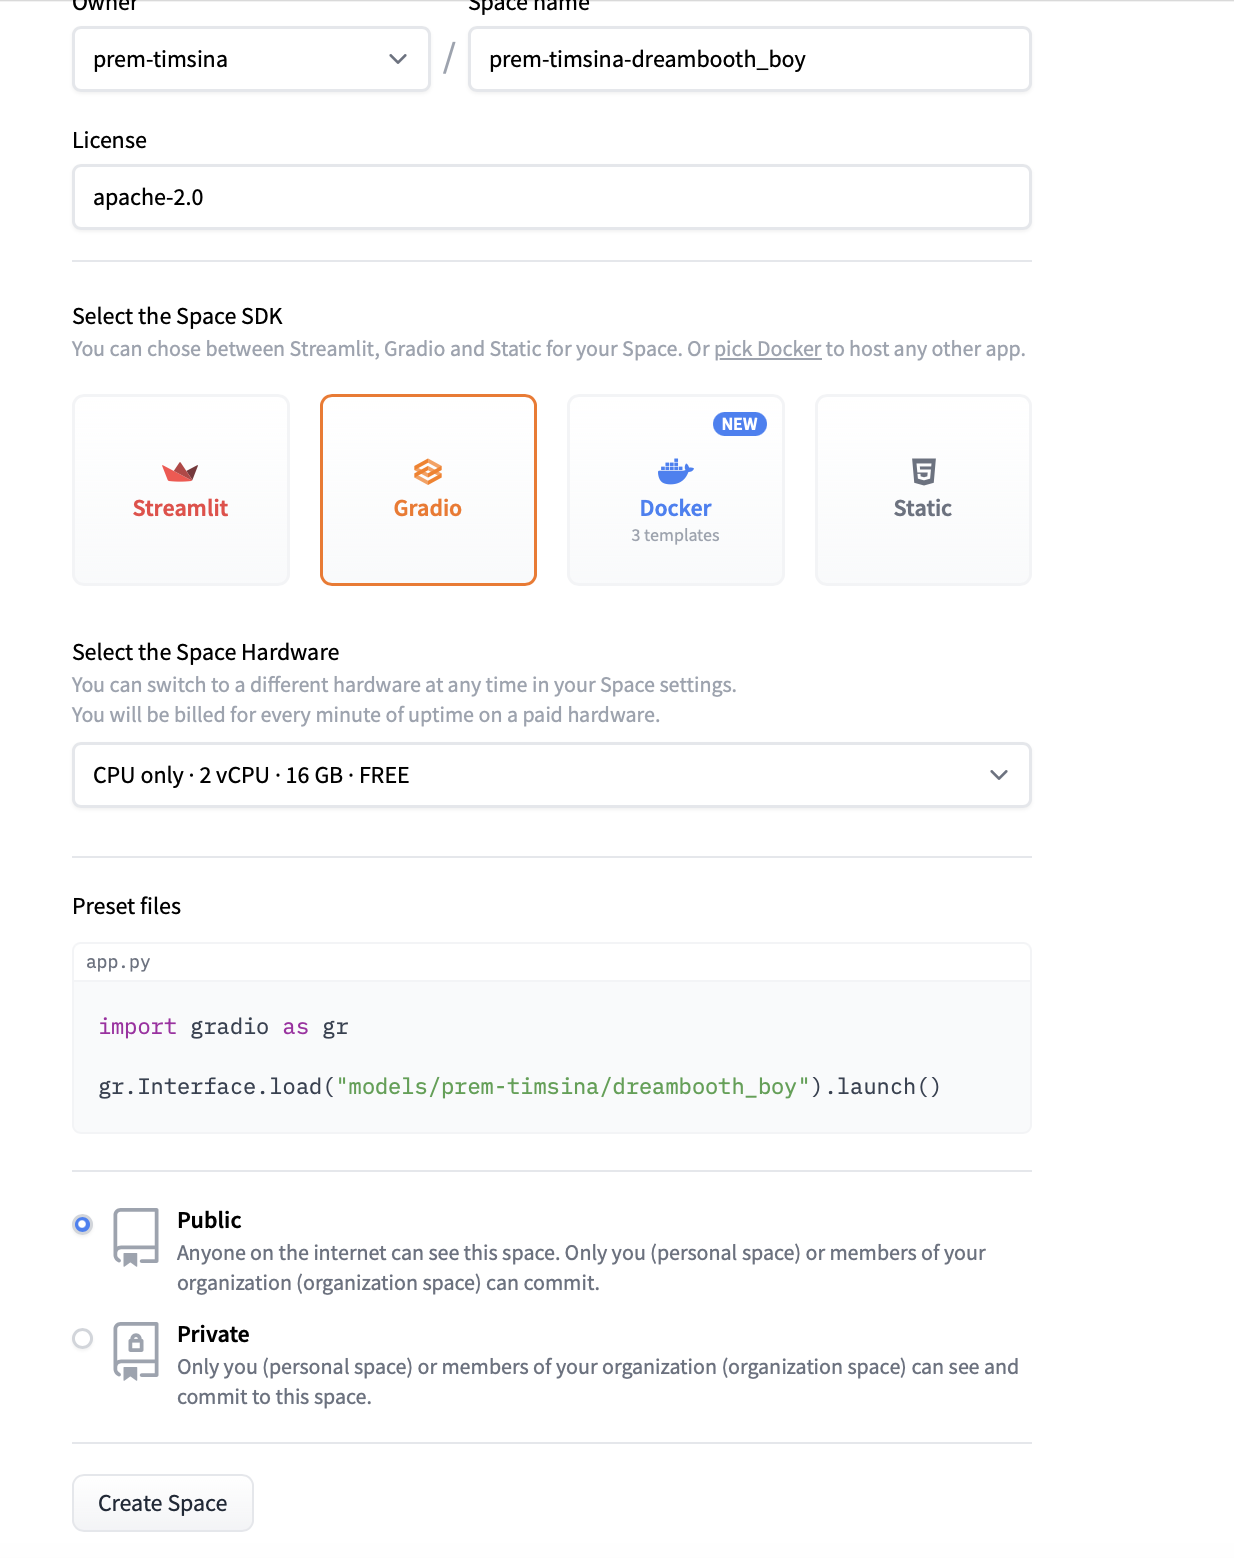



---

---



# ***Your space is running. You will see something like in below diagram.***

---

---





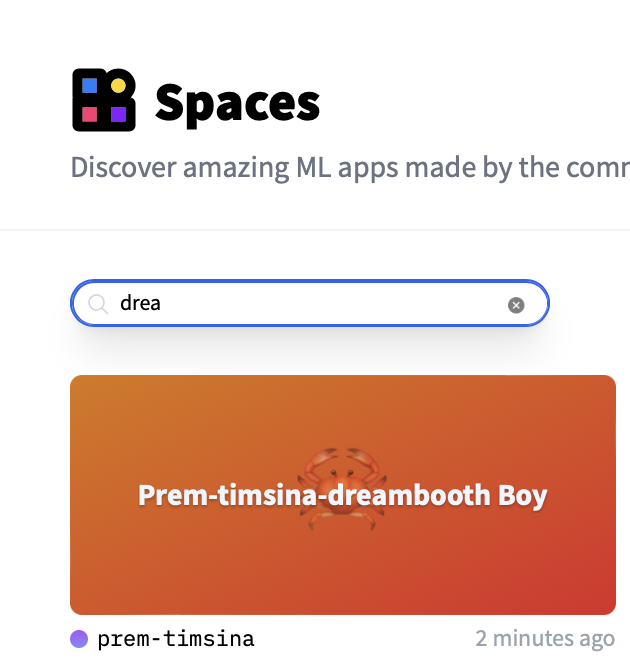